<a href="https://colab.research.google.com/github/thanatkat/Road-To-Data-Engineer-Bootcamp-Datath/blob/main/Workshop1_Data_Collection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

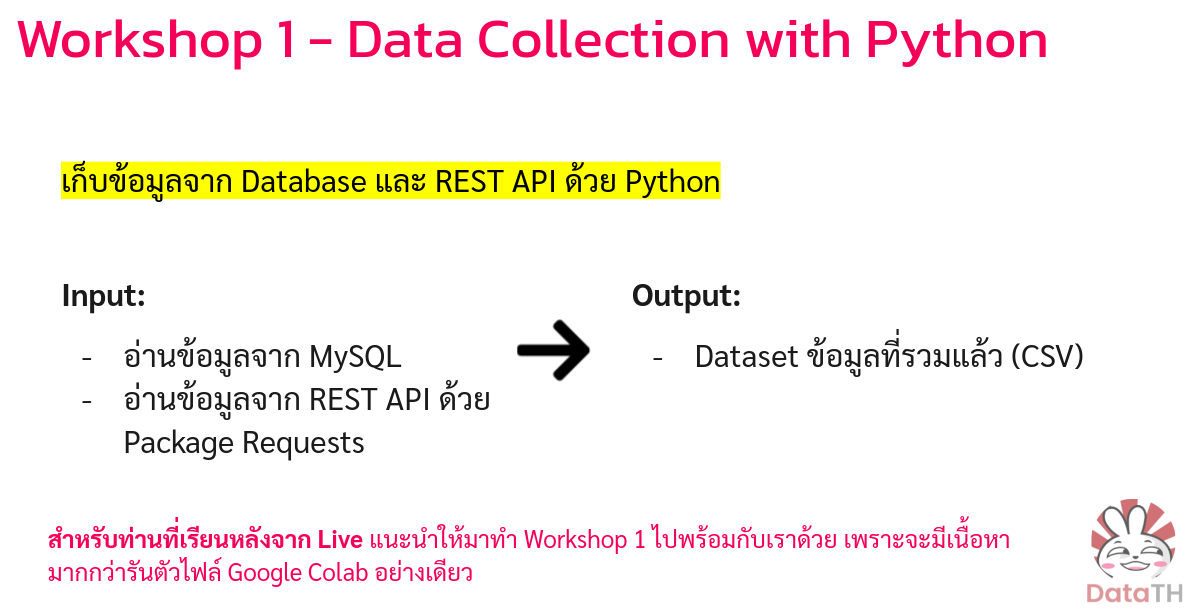

# Install PyMySQL

pymysql เป็น package เชื่อมต่อกับ  MySQL database

In [ ]:
! pip install pymysql

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.7/43.7 kB 3.5 MB/s eta 0:00:00


# Config DB credential: การใช้ config สำหรับเชื่อมต่อ database

credential นี้ใช้เพื่อการเรียน การศึกษาเท่านั้น

In [ ]:
# Show database credential เพื่อการเรียนรู้
import os

class Config:
    MYSQL_HOST = '34.136.184.58' # อาจจะเป็น ip address หรือ url
    MYSQL_PORT = 3306
    MYSQL_USER = 'r2de2'
    MYSQL_PASSWORD = 'I_Love_Data_Engineer'
    MYSQL_DB = 'r2de2' # ใน MySQL เก็บ database ได้หลายอัน
    MYSQL_CHARSET = 'utf8mb4'

In [ ]:
print(Config.MYSQL_PORT)

3306


# Connect to DB

สร้าง Connection ด้วยการ connect ไปที่ DB ด้วย Config ของเรา

In [ ]:
import pymysql

# connect to the database
connection = pymysql.connect(host=Config.MYSQL_HOST,
                             port=Config.MYSQL_PORT,
                             user=Config.MYSQL_USER,
                             password=Config.MYSQL_PASSWORD,
                             db=Config.MYSQL_DB,
                             charset=Config.MYSQL_CHARSET,
                             cursorclass=pymysql.cursors.DictCursor)

In [ ]:
connection

# List table


show tables: List table

cursor คือ object ที่ทำให้เราอ่านค่าใน Database ได้

ดังนั้น จึงนิยมใช้คำสั่ง with ในการจัดการสร้าง cursor ขึ้นมา เมื่อจบคำสั่ง cursor จะถูก close ไปเองโดยอัตโนมัติเมื่อออกนอก scope ของ with

In [ ]:
cursor = connection.cursor()
cursor.execute("show tables;")
tables = cursor.fetchall()
cursor.close()
print(tables)

[{'Tables_in_r2de2': 'audible_data'}, {'Tables_in_r2de2': 'audible_transaction'}]


# Query Table

ใช้ with ปิด cursor อัตโนมัติเมื่อจบคำสั่ง

In [ ]:
with connection.cursor() as cursor:
    cursor.execute("SELECT * FROM audible_data;")
    result = cursor.fetchall()
    print("number of row: ", len(result))

number of row:  2269


In [ ]:
result

In [ ]:
type(result)

list

# Convert to Pandas

In [ ]:
import pandas as pd

In [ ]:
audible_data = pd.DataFrame(result)

In [ ]:
type(audible_data)

pandas.core.frame.DataFrame

In [ ]:
audible_data

In [ ]:
# กำหนด Book_ID เป็น Index
audible_data = audible_data.set_index("Book_ID")

In [ ]:
sql = "SELECT * FROM audible_transaction"
audible_transaction = pd.read_sql(sql, connection)
audible_transaction

<ipython-input-13-be90fe0ebbf2>:2: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  audible_transaction = pd.read_sql(sql, connection)


,timestamp,user_id,book_id,country
0,2021-05-01 00:00:01,ad8eca41,1584,Portugal
1,2021-05-01 00:00:03,561b26c1,829,United States of America
2,2021-05-01 00:00:04,81f149e5,1391,Japan
3,2021-05-01 00:00:07,4f218413,1586,Taiwan
4,2021-05-01 00:00:18,a4066781,300,United States of America
...,...,...,...,...
1998816,2021-07-31 23:59:47,72da1411,600,Portugal
1998817,2021-07-31 23:59:48,620c27c8,462,Montenegro
1998818,2021-07-31 23:59:55,84fe88ab,1656,United States of America
1998819,2021-07-31 23:59:57,fd6cc4fc,522,United States of America


# Join Table: audible_transaction & audible_data

In [ ]:
transaction = audible_transaction.merge(audible_data, how="left", left_on="book_id", right_on="Book_ID")

In [ ]:
transaction

# Convert $ with API

request อ่าน REST API

In [ ]:
import requests

In [ ]:
r = 'https://r2de2-workshop-vmftiryt6q-ts.a.run.app/usd_thb_conversion_rate'

In [ ]:
r = requests.get('https://r2de2-workshop-vmftiryt6q-ts.a.run.app/usd_thb_conversion_rate')
result_conversion_rate = r.json()

http status:
200 = *OK*

In [ ]:
r.status_code

200

In [ ]:
r.text

'{"conversion_rate":{"2021-08-12":33.084,"2021-08-11":33.145,"2021-08-10":33.46,"2021-08-09":33.464,"2021-08-08":33.395,"2021-08-07":33.422,"2021-08-06":33.45,"2021-08-05":33.263,"2021-08-04":33.137,"2021-08-03":33.022,"2021-08-02":32.957,"2021-08-01":32.895,"2021-07-31":32.887,"2021-07-30":32.887,"2021-07-29":32.87,"2021-07-28":32.82,"2021-07-27":32.937,"2021-07-26":32.929,"2021-07-25":32.94,"2021-07-24":32.963,"2021-07-23":32.928,"2021-07-22":32.887,"2021-07-21":32.857,"2021-07-20":32.829,"2021-07-19":32.854,"2021-07-18":32.807,"2021-07-17":32.795,"2021-07-16":32.783,"2021-07-15":32.686,"2021-07-14":32.605,"2021-07-13":32.654,"2021-07-12":32.664,"2021-07-11":32.506,"2021-07-10":32.482,"2021-07-09":32.512,"2021-07-08":32.534,"2021-07-07":32.334,"2021-07-06":32.271,"2021-07-05":32.112,"2021-07-04":32.136,"2021-07-03":32.125,"2021-07-02":32.126,"2021-07-01":32.073,"2021-06-30":32.029,"2021-06-29":32.108,"2021-06-28":31.918,"2021-06-27":31.785,"2021-06-26":31.816,"2021-06-25":31.816,"202

assert ใช้เช็คว่า result_conversion_rate เป็น dict หรือไม่

In [ ]:
print(type(result_conversion_rate))
assert isinstance(result_conversion_rate, dict)

<class 'dict'>


In [ ]:
result_conversion_rate

{'conversion_rate': {'2021-08-12': 33.084,
  '2021-08-11': 33.145,
  '2021-08-10': 33.46,
  '2021-08-09': 33.464,
  '2021-08-08': 33.395,
  '2021-08-07': 33.422,
  '2021-08-06': 33.45,
  '2021-08-05': 33.263,
  '2021-08-04': 33.137,
  '2021-08-03': 33.022,
  '2021-08-02': 32.957,
  '2021-08-01': 32.895,
  '2021-07-31': 32.887,
  '2021-07-30': 32.887,
  '2021-07-29': 32.87,
  '2021-07-28': 32.82,
  '2021-07-27': 32.937,
  '2021-07-26': 32.929,
  '2021-07-25': 32.94,
  '2021-07-24': 32.963,
  '2021-07-23': 32.928,
  '2021-07-22': 32.887,
  '2021-07-21': 32.857,
  '2021-07-20': 32.829,
  '2021-07-19': 32.854,
  '2021-07-18': 32.807,
  '2021-07-17': 32.795,
  '2021-07-16': 32.783,
  '2021-07-15': 32.686,
  '2021-07-14': 32.605,
  '2021-07-13': 32.654,
  '2021-07-12': 32.664,
  '2021-07-11': 32.506,
  '2021-07-10': 32.482,
  '2021-07-09': 32.512,
  '2021-07-08': 32.534,
  '2021-07-07': 32.334,
  '2021-07-06': 32.271,
  '2021-07-05': 32.112,
  '2021-07-04': 32.136,
  '2021-07-03': 32.125,
  

# Convert to Pandas DataFrame

In [ ]:
conversion_rate = pd.DataFrame(result_conversion_rate)

In [ ]:
conversion_rate

,conversion_rate
2021-04-01,31.194
2021-04-02,31.290
2021-04-03,31.256
2021-04-04,31.244
2021-04-05,31.342
...,...
2021-08-08,33.395
2021-08-09,33.464
2021-08-10,33.460
2021-08-11,33.145


แปลง index เป็น column date เพื่อนำไปใช้ join with table transaction

In [ ]:
conversion_rate = conversion_rate.reset_index().rename(columns={'index': 'date'})
conversion_rate[:3]

,date,conversion_rate
0,2021-04-01,31.194
1,2021-04-02,31.290
2,2021-04-03,31.256


# Join Data

In [ ]:
transaction

,timestamp,user_id,book_id,country,Book Title,Book Subtitle,Book Author,Book Narrator,Audio Runtime,Audiobook_Type,Categories,Rating,Total No. of Ratings,Price
0,2021-05-01 00:00:01,ad8eca41,1584,Portugal,Sycamore Row,None,John Grisham,Michael Beck,20 hrs and 46 mins,Unabridged Audiobook,"Mystery, Thriller & Suspense",4.6,25863.0,$35.00
1,2021-05-01 00:00:03,561b26c1,829,United States of America,The 5 Love Languages of Children,The Secret to Loving Children Effectively,Gary Chapman,Chris Fabry,5 hrs and 48 mins,Unabridged Audiobook,"Relationships, Parenting & Personal Development",4.8,2441.0,$19.59
2,2021-05-01 00:00:04,81f149e5,1391,Japan,The Guardians,A Novel,John Grisham,Michael Beck,11 hrs and 50 mins,Unabridged Audiobook,"Mystery, Thriller & Suspense",4.6,26781.0,$31.50
3,2021-05-01 00:00:07,4f218413,1586,Taiwan,How to Be a 3% Man,None,Corey Wayne,Corey Wayne,7 hrs and 33 mins,Unabridged Audiobook,"Relationships, Parenting & Personal Development",4.8,11459.0,$19.95
4,2021-05-01 00:00:18,a4066781,300,United States of America,Napoleon Hill's Outwitting the Devil,The Secret to Freedom and Success,Napoleon Hill,Dan John Miller,5 hrs and 51 mins,Unabridged Audiobook,Business & Careers,4.8,9305.0,$17.49
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1998816,2021-07-31 23:59:47,72da1411,600,Portugal,The Time of Contempt,"The Witcher, Book 2",Andrzej Sapkowski,Peter Kenny,11 hrs and 55 mins,Unabridged Audiobook,Science Fiction & Fantasy,4.7,14344.0,$25.08
1998817,2021-07-31 23:59:48,620c27c8,462,Montenegro,Endurance,Shackleton's Incredible Voyage,Alfred Lansing,Simon Prebble,10 hrs and 20 mins,Unabridged Audiobook,History,4.7,18764.0,$24.95
1998818,2021-07-31 23:59:55,84fe88ab,1656,United States of America,The Spy and the Traitor,The Greatest Espionage Story of the Cold War,Ben Macintyre,John Lee,13 hrs and 20 mins,Unabridged Audiobook,Biographies & Memoirs,4.8,7150.0,$31.95
1998819,2021-07-31 23:59:57,fd6cc4fc,522,United States of America,Lilac Girls,A Novel,Martha Hall Kelly,Cassandra Campbell,17 hrs and 30 mins,Unabridged Audiobook,Literature & Fiction,4.7,19401.0,$31.50


In [ ]:
transaction['date'] = transaction['timestamp']
transaction

,timestamp,user_id,book_id,country,Book Title,Book Subtitle,Book Author,Book Narrator,Audio Runtime,Audiobook_Type,Categories,Rating,Total No. of Ratings,Price,date
0,2021-05-01 00:00:01,ad8eca41,1584,Portugal,Sycamore Row,None,John Grisham,Michael Beck,20 hrs and 46 mins,Unabridged Audiobook,"Mystery, Thriller & Suspense",4.6,25863.0,$35.00,2021-05-01 00:00:01
1,2021-05-01 00:00:03,561b26c1,829,United States of America,The 5 Love Languages of Children,The Secret to Loving Children Effectively,Gary Chapman,Chris Fabry,5 hrs and 48 mins,Unabridged Audiobook,"Relationships, Parenting & Personal Development",4.8,2441.0,$19.59,2021-05-01 00:00:03
2,2021-05-01 00:00:04,81f149e5,1391,Japan,The Guardians,A Novel,John Grisham,Michael Beck,11 hrs and 50 mins,Unabridged Audiobook,"Mystery, Thriller & Suspense",4.6,26781.0,$31.50,2021-05-01 00:00:04
3,2021-05-01 00:00:07,4f218413,1586,Taiwan,How to Be a 3% Man,None,Corey Wayne,Corey Wayne,7 hrs and 33 mins,Unabridged Audiobook,"Relationships, Parenting & Personal Development",4.8,11459.0,$19.95,2021-05-01 00:00:07
4,2021-05-01 00:00:18,a4066781,300,United States of America,Napoleon Hill's Outwitting the Devil,The Secret to Freedom and Success,Napoleon Hill,Dan John Miller,5 hrs and 51 mins,Unabridged Audiobook,Business & Careers,4.8,9305.0,$17.49,2021-05-01 00:00:18
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1998816,2021-07-31 23:59:47,72da1411,600,Portugal,The Time of Contempt,"The Witcher, Book 2",Andrzej Sapkowski,Peter Kenny,11 hrs and 55 mins,Unabridged Audiobook,Science Fiction & Fantasy,4.7,14344.0,$25.08,2021-07-31 23:59:47
1998817,2021-07-31 23:59:48,620c27c8,462,Montenegro,Endurance,Shackleton's Incredible Voyage,Alfred Lansing,Simon Prebble,10 hrs and 20 mins,Unabridged Audiobook,History,4.7,18764.0,$24.95,2021-07-31 23:59:48
1998818,2021-07-31 23:59:55,84fe88ab,1656,United States of America,The Spy and the Traitor,The Greatest Espionage Story of the Cold War,Ben Macintyre,John Lee,13 hrs and 20 mins,Unabridged Audiobook,Biographies & Memoirs,4.8,7150.0,$31.95,2021-07-31 23:59:55
1998819,2021-07-31 23:59:57,fd6cc4fc,522,United States of America,Lilac Girls,A Novel,Martha Hall Kelly,Cassandra Campbell,17 hrs and 30 mins,Unabridged Audiobook,Literature & Fiction,4.7,19401.0,$31.50,2021-07-31 23:59:57


Convert timestamp to date with 2 dataframe (transaction, conversion_rate)

In [ ]:
transaction['date'] = pd.to_datetime(transaction['date']).dt.date
conversion_rate['date'] = pd.to_datetime(conversion_rate['date']).dt.date
transaction.head

<bound method NDFrame.head of                   timestamp   user_id  book_id                   country  \
0       2021-05-01 00:00:01  ad8eca41     1584                  Portugal   
1       2021-05-01 00:00:03  561b26c1      829  United States of America   
2       2021-05-01 00:00:04  81f149e5     1391                     Japan   
3       2021-05-01 00:00:07  4f218413     1586                    Taiwan   
4       2021-05-01 00:00:18  a4066781      300  United States of America   
...                     ...       ...      ...                       ...   
1998816 2021-07-31 23:59:47  72da1411      600                  Portugal   
1998817 2021-07-31 23:59:48  620c27c8      462                Montenegro   
1998818 2021-07-31 23:59:55  84fe88ab     1656  United States of America   
1998819 2021-07-31 23:59:57  fd6cc4fc      522  United States of America   
1998820 2021-07-31 23:59:59  9f4d5e3b      110  United States of America   

                                   Book Title  \
0       

In [ ]:
# merge 2 dataframe
# final_df
final_df = transaction.merge(conversion_rate, how='left', left_on='date', right_on = 'date')

In [ ]:
final_df

,timestamp,user_id,book_id,country,Book Title,Book Subtitle,Book Author,Book Narrator,Audio Runtime,Audiobook_Type,Categories,Rating,Total No. of Ratings,Price,date,conversion_rate
0,2021-05-01 00:00:01,ad8eca41,1584,Portugal,Sycamore Row,None,John Grisham,Michael Beck,20 hrs and 46 mins,Unabridged Audiobook,"Mystery, Thriller & Suspense",4.6,25863.0,$35.00,2021-05-01,31.140
1,2021-05-01 00:00:03,561b26c1,829,United States of America,The 5 Love Languages of Children,The Secret to Loving Children Effectively,Gary Chapman,Chris Fabry,5 hrs and 48 mins,Unabridged Audiobook,"Relationships, Parenting & Personal Development",4.8,2441.0,$19.59,2021-05-01,31.140
2,2021-05-01 00:00:04,81f149e5,1391,Japan,The Guardians,A Novel,John Grisham,Michael Beck,11 hrs and 50 mins,Unabridged Audiobook,"Mystery, Thriller & Suspense",4.6,26781.0,$31.50,2021-05-01,31.140
3,2021-05-01 00:00:07,4f218413,1586,Taiwan,How to Be a 3% Man,None,Corey Wayne,Corey Wayne,7 hrs and 33 mins,Unabridged Audiobook,"Relationships, Parenting & Personal Development",4.8,11459.0,$19.95,2021-05-01,31.140
4,2021-05-01 00:00:18,a4066781,300,United States of America,Napoleon Hill's Outwitting the Devil,The Secret to Freedom and Success,Napoleon Hill,Dan John Miller,5 hrs and 51 mins,Unabridged Audiobook,Business & Careers,4.8,9305.0,$17.49,2021-05-01,31.140
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1998816,2021-07-31 23:59:47,72da1411,600,Portugal,The Time of Contempt,"The Witcher, Book 2",Andrzej Sapkowski,Peter Kenny,11 hrs and 55 mins,Unabridged Audiobook,Science Fiction & Fantasy,4.7,14344.0,$25.08,2021-07-31,32.887
1998817,2021-07-31 23:59:48,620c27c8,462,Montenegro,Endurance,Shackleton's Incredible Voyage,Alfred Lansing,Simon Prebble,10 hrs and 20 mins,Unabridged Audiobook,History,4.7,18764.0,$24.95,2021-07-31,32.887
1998818,2021-07-31 23:59:55,84fe88ab,1656,United States of America,The Spy and the Traitor,The Greatest Espionage Story of the Cold War,Ben Macintyre,John Lee,13 hrs and 20 mins,Unabridged Audiobook,Biographies & Memoirs,4.8,7150.0,$31.95,2021-07-31,32.887
1998819,2021-07-31 23:59:57,fd6cc4fc,522,United States of America,Lilac Girls,A Novel,Martha Hall Kelly,Cassandra Campbell,17 hrs and 30 mins,Unabridged Audiobook,Literature & Fiction,4.7,19401.0,$31.50,2021-07-31,32.887


ตอนนี้ price เป็น string สามารถใช้ pandas แก้ไขได้โดยใช้ lamda function axis = 1 = ประมวลผลทีละ row

In [ ]:
final_df['Price'] = final_df.apply(lambda x: x['Price'].replace("$", ""), axis=1)
final_df.head

<bound method NDFrame.head of                   timestamp   user_id  book_id                   country  \
0       2021-05-01 00:00:01  ad8eca41     1584                  Portugal   
1       2021-05-01 00:00:03  561b26c1      829  United States of America   
2       2021-05-01 00:00:04  81f149e5     1391                     Japan   
3       2021-05-01 00:00:07  4f218413     1586                    Taiwan   
4       2021-05-01 00:00:18  a4066781      300  United States of America   
...                     ...       ...      ...                       ...   
1998816 2021-07-31 23:59:47  72da1411      600                  Portugal   
1998817 2021-07-31 23:59:48  620c27c8      462                Montenegro   
1998818 2021-07-31 23:59:55  84fe88ab     1656  United States of America   
1998819 2021-07-31 23:59:57  fd6cc4fc      522  United States of America   
1998820 2021-07-31 23:59:59  9f4d5e3b      110  United States of America   

                                   Book Title  \
0       

In [ ]:
final_df["Price"] = final_df['Price'].astype(float)

In [ ]:
final_df

,timestamp,user_id,book_id,country,Book Title,Book Subtitle,Book Author,Book Narrator,Audio Runtime,Audiobook_Type,Categories,Rating,Total No. of Ratings,Price,date,conversion_rate
0,2021-05-01 00:00:01,ad8eca41,1584,Portugal,Sycamore Row,None,John Grisham,Michael Beck,20 hrs and 46 mins,Unabridged Audiobook,"Mystery, Thriller & Suspense",4.6,25863.0,35.00,2021-05-01,31.140
1,2021-05-01 00:00:03,561b26c1,829,United States of America,The 5 Love Languages of Children,The Secret to Loving Children Effectively,Gary Chapman,Chris Fabry,5 hrs and 48 mins,Unabridged Audiobook,"Relationships, Parenting & Personal Development",4.8,2441.0,19.59,2021-05-01,31.140
2,2021-05-01 00:00:04,81f149e5,1391,Japan,The Guardians,A Novel,John Grisham,Michael Beck,11 hrs and 50 mins,Unabridged Audiobook,"Mystery, Thriller & Suspense",4.6,26781.0,31.50,2021-05-01,31.140
3,2021-05-01 00:00:07,4f218413,1586,Taiwan,How to Be a 3% Man,None,Corey Wayne,Corey Wayne,7 hrs and 33 mins,Unabridged Audiobook,"Relationships, Parenting & Personal Development",4.8,11459.0,19.95,2021-05-01,31.140
4,2021-05-01 00:00:18,a4066781,300,United States of America,Napoleon Hill's Outwitting the Devil,The Secret to Freedom and Success,Napoleon Hill,Dan John Miller,5 hrs and 51 mins,Unabridged Audiobook,Business & Careers,4.8,9305.0,17.49,2021-05-01,31.140
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1998816,2021-07-31 23:59:47,72da1411,600,Portugal,The Time of Contempt,"The Witcher, Book 2",Andrzej Sapkowski,Peter Kenny,11 hrs and 55 mins,Unabridged Audiobook,Science Fiction & Fantasy,4.7,14344.0,25.08,2021-07-31,32.887
1998817,2021-07-31 23:59:48,620c27c8,462,Montenegro,Endurance,Shackleton's Incredible Voyage,Alfred Lansing,Simon Prebble,10 hrs and 20 mins,Unabridged Audiobook,History,4.7,18764.0,24.95,2021-07-31,32.887
1998818,2021-07-31 23:59:55,84fe88ab,1656,United States of America,The Spy and the Traitor,The Greatest Espionage Story of the Cold War,Ben Macintyre,John Lee,13 hrs and 20 mins,Unabridged Audiobook,Biographies & Memoirs,4.8,7150.0,31.95,2021-07-31,32.887
1998819,2021-07-31 23:59:57,fd6cc4fc,522,United States of America,Lilac Girls,A Novel,Martha Hall Kelly,Cassandra Campbell,17 hrs and 30 mins,Unabridged Audiobook,Literature & Fiction,4.7,19401.0,31.50,2021-07-31,32.887


In [ ]:
final_df.dtypes

timestamp               datetime64[ns]
user_id                         object
book_id                          int64
country                         object
Book Title                      object
Book Subtitle                   object
Book Author                     object
Book Narrator                   object
Audio Runtime                   object
Audiobook_Type                  object
Categories                      object
Rating                          object
Total No. of Ratings           float64
Price                          float64
date                            object
conversion_rate                float64
dtype: object

แปลงเป็น THB

In [ ]:
final_df['THB_Price'] = final_df['Price'] * final_df['conversion_rate']
final_df

,timestamp,user_id,book_id,country,Book Title,Book Subtitle,Book Author,Book Narrator,Audio Runtime,Audiobook_Type,Categories,Rating,Total No. of Ratings,Price,date,conversion_rate,THB_Price
0,2021-05-01 00:00:01,ad8eca41,1584,Portugal,Sycamore Row,None,John Grisham,Michael Beck,20 hrs and 46 mins,Unabridged Audiobook,"Mystery, Thriller & Suspense",4.6,25863.0,35.00,2021-05-01,31.140,1089.90000
1,2021-05-01 00:00:03,561b26c1,829,United States of America,The 5 Love Languages of Children,The Secret to Loving Children Effectively,Gary Chapman,Chris Fabry,5 hrs and 48 mins,Unabridged Audiobook,"Relationships, Parenting & Personal Development",4.8,2441.0,19.59,2021-05-01,31.140,610.03260
2,2021-05-01 00:00:04,81f149e5,1391,Japan,The Guardians,A Novel,John Grisham,Michael Beck,11 hrs and 50 mins,Unabridged Audiobook,"Mystery, Thriller & Suspense",4.6,26781.0,31.50,2021-05-01,31.140,980.91000
3,2021-05-01 00:00:07,4f218413,1586,Taiwan,How to Be a 3% Man,None,Corey Wayne,Corey Wayne,7 hrs and 33 mins,Unabridged Audiobook,"Relationships, Parenting & Personal Development",4.8,11459.0,19.95,2021-05-01,31.140,621.24300
4,2021-05-01 00:00:18,a4066781,300,United States of America,Napoleon Hill's Outwitting the Devil,The Secret to Freedom and Success,Napoleon Hill,Dan John Miller,5 hrs and 51 mins,Unabridged Audiobook,Business & Careers,4.8,9305.0,17.49,2021-05-01,31.140,544.63860
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1998816,2021-07-31 23:59:47,72da1411,600,Portugal,The Time of Contempt,"The Witcher, Book 2",Andrzej Sapkowski,Peter Kenny,11 hrs and 55 mins,Unabridged Audiobook,Science Fiction & Fantasy,4.7,14344.0,25.08,2021-07-31,32.887,824.80596
1998817,2021-07-31 23:59:48,620c27c8,462,Montenegro,Endurance,Shackleton's Incredible Voyage,Alfred Lansing,Simon Prebble,10 hrs and 20 mins,Unabridged Audiobook,History,4.7,18764.0,24.95,2021-07-31,32.887,820.53065
1998818,2021-07-31 23:59:55,84fe88ab,1656,United States of America,The Spy and the Traitor,The Greatest Espionage Story of the Cold War,Ben Macintyre,John Lee,13 hrs and 20 mins,Unabridged Audiobook,Biographies & Memoirs,4.8,7150.0,31.95,2021-07-31,32.887,1050.73965
1998819,2021-07-31 23:59:57,fd6cc4fc,522,United States of America,Lilac Girls,A Novel,Martha Hall Kelly,Cassandra Campbell,17 hrs and 30 mins,Unabridged Audiobook,Literature & Fiction,4.7,19401.0,31.50,2021-07-31,32.887,1035.94050


อีกวิธีนึง เอาสองคอลัมน์มาคูณกันตรงๆ


In [ ]:
def convert_rate(price, rate):
    return price * rate

# final_df['Price'] = final_df.apply(lambda x: x['Price'] * x['conversion_rate'], axis = 1)
final_df['Price'] = final_df.apply(lambda x: convert_rate(x['Price'], x["conversion_rate"]), axis = 1)

In [ ]:
final_df

ลบ Column data ซ้ำกับ timestamp

In [ ]:
final_df = final_df.drop('date', axis = 1)
final_df

,timestamp,user_id,book_id,country,Book Title,Book Subtitle,Book Author,Book Narrator,Audio Runtime,Audiobook_Type,Categories,Rating,Total No. of Ratings,Price,conversion_rate,THB_Price
0,2021-05-01 00:00:01,ad8eca41,1584,Portugal,Sycamore Row,None,John Grisham,Michael Beck,20 hrs and 46 mins,Unabridged Audiobook,"Mystery, Thriller & Suspense",4.6,25863.0,35.00,31.140,1089.90000
1,2021-05-01 00:00:03,561b26c1,829,United States of America,The 5 Love Languages of Children,The Secret to Loving Children Effectively,Gary Chapman,Chris Fabry,5 hrs and 48 mins,Unabridged Audiobook,"Relationships, Parenting & Personal Development",4.8,2441.0,19.59,31.140,610.03260
2,2021-05-01 00:00:04,81f149e5,1391,Japan,The Guardians,A Novel,John Grisham,Michael Beck,11 hrs and 50 mins,Unabridged Audiobook,"Mystery, Thriller & Suspense",4.6,26781.0,31.50,31.140,980.91000
3,2021-05-01 00:00:07,4f218413,1586,Taiwan,How to Be a 3% Man,None,Corey Wayne,Corey Wayne,7 hrs and 33 mins,Unabridged Audiobook,"Relationships, Parenting & Personal Development",4.8,11459.0,19.95,31.140,621.24300
4,2021-05-01 00:00:18,a4066781,300,United States of America,Napoleon Hill's Outwitting the Devil,The Secret to Freedom and Success,Napoleon Hill,Dan John Miller,5 hrs and 51 mins,Unabridged Audiobook,Business & Careers,4.8,9305.0,17.49,31.140,544.63860
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1998816,2021-07-31 23:59:47,72da1411,600,Portugal,The Time of Contempt,"The Witcher, Book 2",Andrzej Sapkowski,Peter Kenny,11 hrs and 55 mins,Unabridged Audiobook,Science Fiction & Fantasy,4.7,14344.0,25.08,32.887,824.80596
1998817,2021-07-31 23:59:48,620c27c8,462,Montenegro,Endurance,Shackleton's Incredible Voyage,Alfred Lansing,Simon Prebble,10 hrs and 20 mins,Unabridged Audiobook,History,4.7,18764.0,24.95,32.887,820.53065
1998818,2021-07-31 23:59:55,84fe88ab,1656,United States of America,The Spy and the Traitor,The Greatest Espionage Story of the Cold War,Ben Macintyre,John Lee,13 hrs and 20 mins,Unabridged Audiobook,Biographies & Memoirs,4.8,7150.0,31.95,32.887,1050.73965
1998819,2021-07-31 23:59:57,fd6cc4fc,522,United States of America,Lilac Girls,A Novel,Martha Hall Kelly,Cassandra Campbell,17 hrs and 30 mins,Unabridged Audiobook,Literature & Fiction,4.7,19401.0,31.50,32.887,1035.94050


# Save to CSV

ถ้าไม่อยากให้มี index ขึ้นนำหน้าในใส่เป็น False

In [ ]:
final_df.to_csv('output.csv', index = False )

เปิดดูไฟล์ด้วย bash command

In [ ]:
!head output.csv

timestamp,user_id,book_id,country,Book Title,Book Subtitle,Book Author,Book Narrator,Audio Runtime,Audiobook_Type,Categories,Rating,Total No. of Ratings,Price,conversion_rate,THB_Price
2021-05-01 00:00:01,ad8eca41,1584,Portugal,Sycamore Row,,John Grisham,Michael Beck,20 hrs and 46 mins,Unabridged Audiobook,"Mystery, Thriller & Suspense",4.6,25863.0,33939.486000000004,31.14,1089.9
2021-05-01 00:00:03,561b26c1,829,United States of America,The 5 Love Languages of Children,The Secret to Loving Children Effectively,Gary Chapman,Chris Fabry,5 hrs and 48 mins,Unabridged Audiobook,"Relationships, Parenting & Personal Development",4.8,2441.0,18996.415164000002,31.14,610.0326
2021-05-01 00:00:04,81f149e5,1391,Japan,The Guardians,A Novel,John Grisham,Michael Beck,11 hrs and 50 mins,Unabridged Audiobook,"Mystery, Thriller & Suspense",4.6,26781.0,30545.5374,31.14,980.91
2021-05-01 00:00:07,4f218413,1586,Taiwan,How to Be a 3% Man,,Corey Wayne,Corey Wayne,7 hrs and 33 mins,Unabridged Audiobook,"Relat

# สร้างไฟล์ .env จากใน colab

In [ ]:
%%writefile .env
MYSQL_HOST='ใส่ host ที่นี่'
MYSQL_PORT= 3306
MYSQL_USER = 'ใส่ user ที่นี่'
MYSQL_PASSWORD = 'ความลับ'
MYSQL_DB = 'ใส่ชื่อ db ที่นี่'
MYSQL_CHARSET = 'utf8mb4'

Overwriting .env


In [ ]:
!cat .env

MYSQL_HOST='ใส่ host ที่นี่'
MYSQL_PORT= 3306
MYSQL_USER = 'ใส่ user ที่นี่'
MYSQL_PASSWORD = 'ความลับ'
MYSQL_DB = 'ใส่ชื่อ db ที่นี่'
MYSQL_CHARSET = 'utf8mb4'


อ่านตัวแปร .env

In [ ]:
!pip install python-dotenv

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import os
from dotenv import load_dotenv

load_dotenv()

True

# Homework

จงแสดง Category ที่มีรายได้มากที่สุดสามอันดับแรก

In [ ]:
categories_group = final_df.groupby('Categories').sum()["THB_Price"].nlargest(3)
categories_group

<ipython-input-49-4188df8fc169>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  categories_group = final_df.groupby('Categories').sum()["THB_Price"].nlargest(3)


Categories
Literature & Fiction         5.534005e+08
Science Fiction & Fantasy    4.172527e+08
Biographies & Memoirs        1.905936e+08
Name: THB_Price, dtype: float64

จงแดสงขื่อหนังสือที่ขายดีที่สุด สามอันดับแรก ของ Category ที่ขายดีอันดับหนึ่งจากข้อด้านบน พร้อมจำนวนเงิน (บาท)

In [ ]:
final_df[final_df['Categories'] == 'Literature & Fiction'].groupby('Book Title').sum()["THB_Price"].nlargest(3)

<ipython-input-61-57816cf82b1b>:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  final_df[final_df['Categories'] == 'Literature & Fiction'].groupby('Book Title').sum()["THB_Price"].nlargest(3)


Book Title
A Game of Thrones          2.890464e+07
Where the Crawdads Sing    2.398011e+07
The Stand                  1.438659e+07
Name: THB_Price, dtype: float64